# Análise de Depressão Estudantil com Redes Neurais

Este notebook implementa um modelo de Redes Neurais para classificação binária de depressão em estudantes. As Redes Neurais são técnicas de aprendizado de máquina inspiradas no funcionamento do cérebro humano, capazes de capturar padrões complexos em dados e realizar previsões precisas, sendo especialmente eficazes para problemas de classificação com datasets de média a alta dimensionalidade.

## Objetivos
- Definir a arquitetura da rede neural
- Computar o 𝐸𝑖𝑛 e 𝐸𝑜𝑢t
- Analisar a existência de overfitting;
- Avaliar o desempenho do modelo

Carregamento de todas as bibliotecas necessárias para análise de dados, construção do modelo, validação e visualização dos resultados.

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras import regularizers
from keras.callbacks import EarlyStopping

from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score
)


In [46]:
df = pd.read_csv("../data/Student_Depression_Cleaned.csv")

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Weighted Stress,Mental_Vulnerability_Score,Extreme_Mental_Crisis,Ultimate_Depression_Predictor,Mental_Health_Crisis_Index,Stress_Vulnerability_Multiplier,Depression
0,1,1,2.0,5.90,5.0,2,2,2,0,3.0,2.0,1,2.0,0.395,0,0.3,2,1.40,0
1,1,2,4.0,8.13,3.0,2,2,3,1,1.0,1.0,0,2.8,0.655,1,0.5,4,2.00,0
2,0,2,2.0,5.70,3.0,1,3,6,0,4.0,1.0,0,1.6,0.200,0,0.0,1,0.60,0
3,0,2,3.0,9.54,4.0,3,3,2,0,1.0,2.0,0,2.6,0.210,0,0.0,0,0.50,0
4,1,2,2.0,8.04,4.0,1,1,1,0,0.0,1.0,1,1.6,0.400,0,0.3,2,1.05,0


In [47]:
df.shape

(15870, 19)

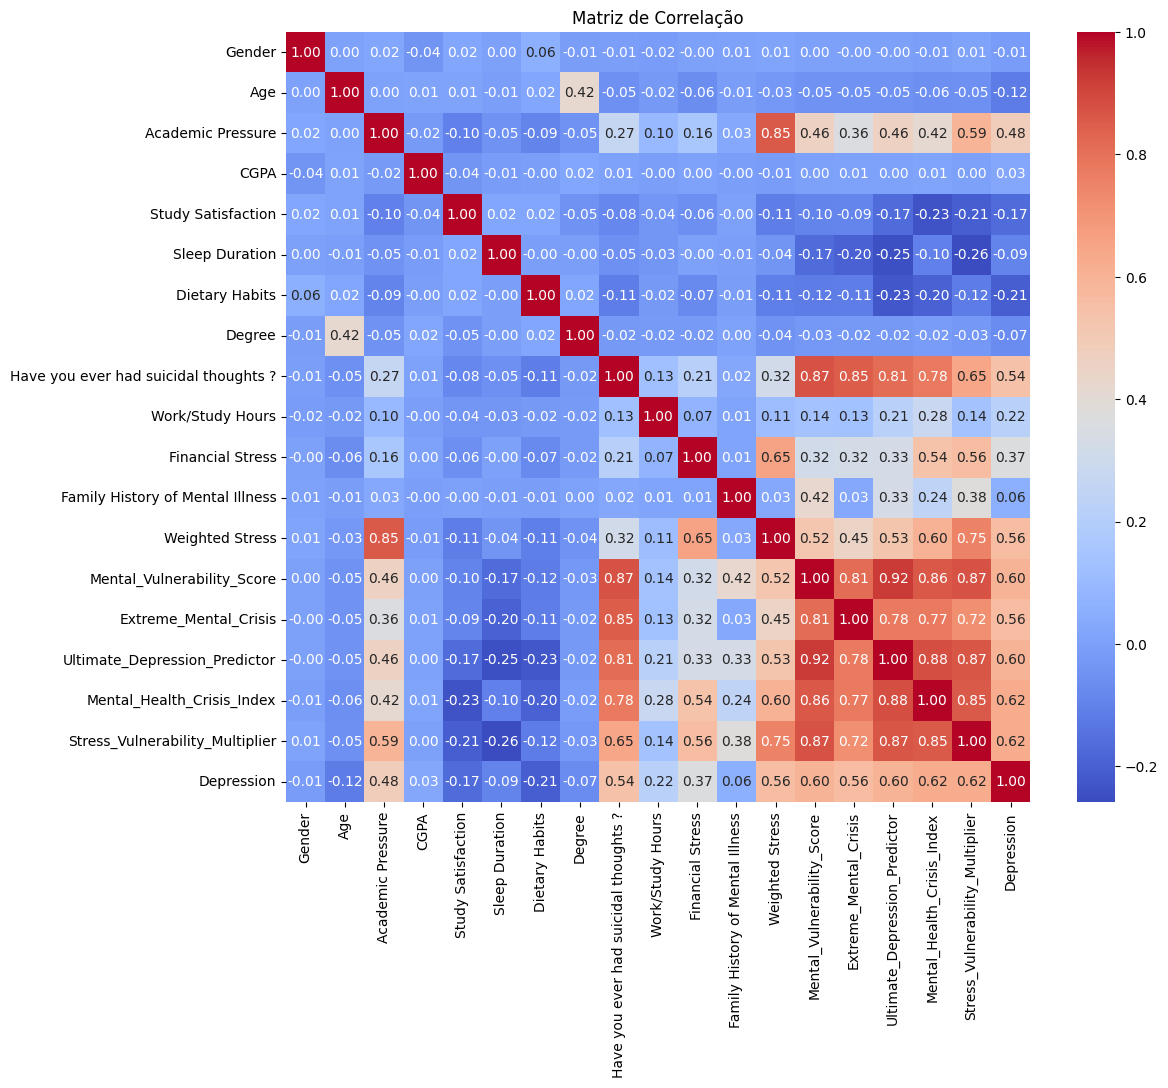

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlação')
plt.show()

In [49]:
features = [
    'Academic Pressure', 'Have you ever had suicidal thoughts ?','Weighted Stress',
    'Financial Stress','Extreme_Mental_Crisis','Mental_Vulnerability_Score','Mental_Health_Crisis_Index','Stress_Vulnerability_Multiplier',
    'Ultimate_Depression_Predictor','Family History of Mental Illness','Work/Study Hours',
]

df_feature = df[features]

df_feature.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Weighted Stress,Financial Stress,Extreme_Mental_Crisis,Mental_Vulnerability_Score,Mental_Health_Crisis_Index,Stress_Vulnerability_Multiplier,Ultimate_Depression_Predictor,Family History of Mental Illness,Work/Study Hours
0,2.0,0,2.0,2.0,0,0.395,2,1.40,0.3,1,3.0
1,4.0,1,2.8,1.0,1,0.655,4,2.00,0.5,0,1.0
2,2.0,0,1.6,1.0,0,0.200,1,0.60,0.0,0,4.0
3,3.0,0,2.6,2.0,0,0.210,0,0.50,0.0,0,1.0
4,2.0,0,1.6,1.0,0,0.400,2,1.05,0.3,1,0.0


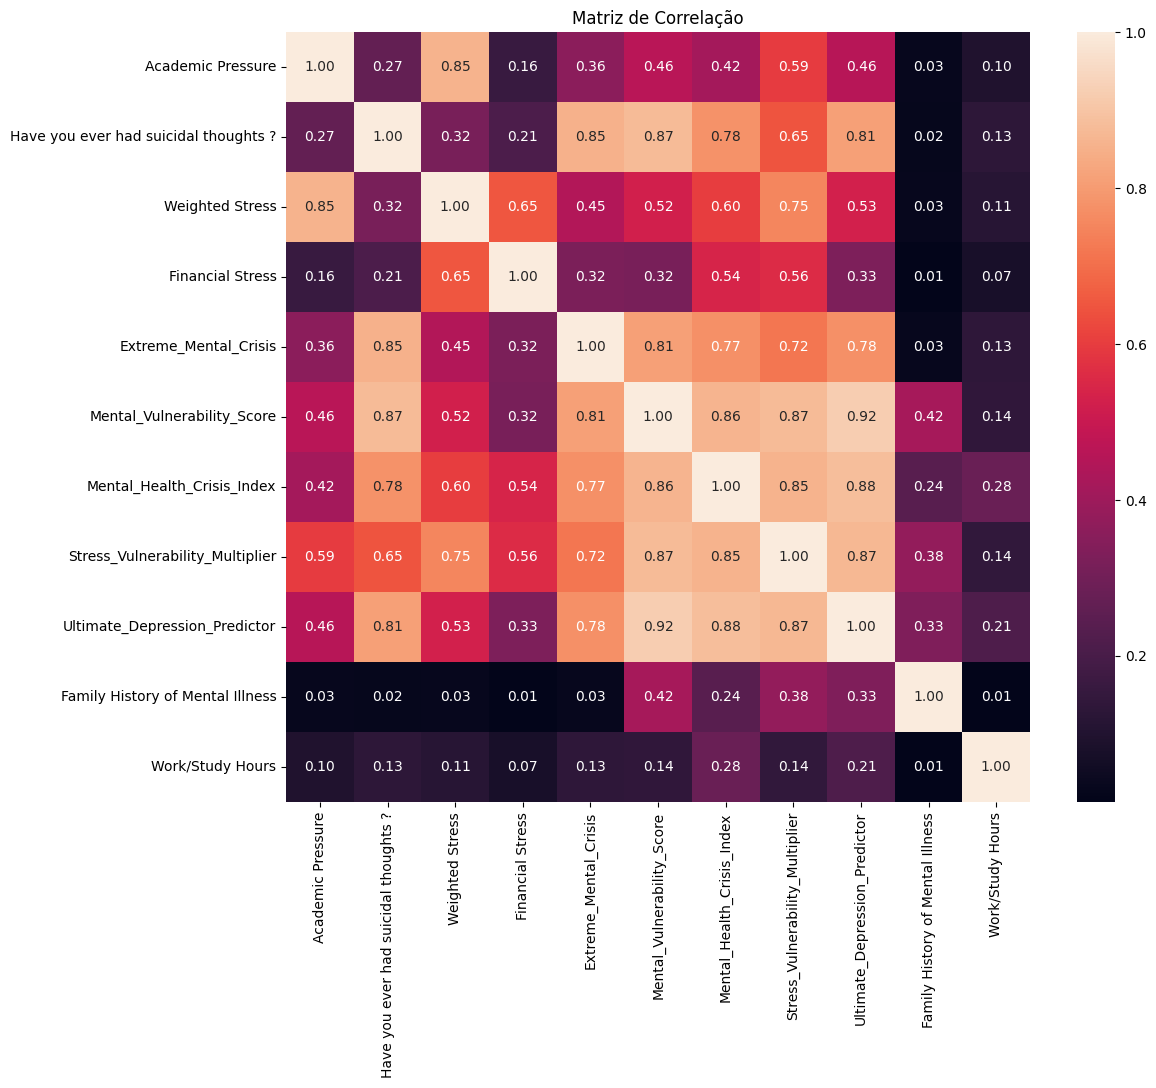

In [50]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_feature.corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [51]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15870 entries, 0 to 15869
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Academic Pressure                      15870 non-null  float64
 1   Have you ever had suicidal thoughts ?  15870 non-null  int64  
 2   Weighted Stress                        15870 non-null  float64
 3   Financial Stress                       15870 non-null  float64
 4   Extreme_Mental_Crisis                  15870 non-null  int64  
 5   Mental_Vulnerability_Score             15870 non-null  float64
 6   Mental_Health_Crisis_Index             15870 non-null  int64  
 7   Stress_Vulnerability_Multiplier        15870 non-null  float64
 8   Ultimate_Depression_Predictor          15870 non-null  float64
 9   Family History of Mental Illness       15870 non-null  int64  
 10  Work/Study Hours                       15870 non-null  float64
dtypes:

In [52]:
print("\nDistribuição da variável target (Depression):")
print(df['Depression'].value_counts())


Distribuição da variável target (Depression):
Depression
0    7935
1    7935
Name: count, dtype: int64


In [53]:
print("\nPercentual por classe:")
print(df['Depression'].value_counts(normalize=True) * 100)


Percentual por classe:
Depression
0    50.0
1    50.0
Name: proportion, dtype: float64


### 2. Preparação dos Dados e Definição de Parâmetros

#### Definição dos Parâmetros Globais

Para garantir a reprodutibilidade dos experimentos e otimizar o treinamento das redes neurais, definimos os seguintes parâmetros globais:

- **BATCH_SIZE = 128**: Tamanho do lote para treinamento. Este valor oferece um bom equilíbrio entre eficiência computacional e estabilidade do gradiente durante o treinamento.

- **RANDOM_STATE = 42**: Semente para geração de números aleatórios, garantindo que os resultados sejam reproduzíveis em execuções subsequentes.

Estes parâmetros serão utilizados consistentemente em todas as etapas do pipeline de machine learning, desde a divisão dos dados até o treinamento final dos modelos.

In [54]:
BATCH_SIZE = 64
RANDOM_STATE = 42

X = df[features[:-1]] 
y = df['Depression']   


In [55]:
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Shape de X: (15870, 10)
Shape de y: (15870,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled


print("\nDivisão dos dados:\n")
print(f"Treino: \nX={X_train.shape}, y={y_train.shape}")
print(f"\nTeste: \nX={X_test.shape}, y={y_test.shape}")


Divisão dos dados:

Treino: 
X=(12696, 10), y=(12696,)

Teste: 
X=(3174, 10), y=(3174,)


### 3. Implementação da Rede Neural - Modelo Simples

#### Arquitetura do Modelo

Iniciamos com uma arquitetura de rede neural simples para estabelecer uma linha de base (baseline) para o nosso problema de classificação binária. Esta abordagem minimalista nos permite compreender o comportamento fundamental do modelo antes de explorar arquiteturas mais complexas.

#### Características da Arquitetura

**Camada de Entrada:**
- **Input Layer**: Recebe 10 features de entrada, correspondendo às variáveis preditoras selecionadas durante a análise exploratória

**Camada Oculta:**
- **Dense Layer**: 60 neurônios com ativação tangente hiperbólica (tanh)
- **Kernel Initializer**: 'normal' - inicialização dos pesos com distribuição normal
- **Função de Ativação**: tanh - adequada para capturar relações não-lineares entre as features

**Camada de Saída:**
- **Output Layer**: 1 neurônio com ativação sigmoid
- **Kernel Initializer**: 'normal' - inicialização consistente com a camada anterior  
- **Função de Ativação**: sigmoid - produz probabilidades entre 0 e 1, ideal para classificação binária

#### Justificativa das Escolhas

A **função de ativação tanh** na camada oculta foi escolhida por sua capacidade de produzir saídas no intervalo [-1, 1], o que pode ser benéfico para o aprendizado em problemas com dados padronizados. A **função sigmoid** na saída é padrão para classificação binária, convertendo os valores de saída em probabilidades interpretáveis.

O número de **60 neurônios** na camada oculta representa um compromisso entre capacidade de aprendizado e eficiência computacional, fornecendo flexibilidade suficiente para capturar padrões nos dados sem criar uma arquitetura excessivamente complexa.

Esta configuração serve como nosso **modelo baseline**, estabelecendo uma referência de desempenho que será comparada com arquiteturas mais sofisticadas posteriormente implementadas no projeto.

In [57]:
# Criação do modelo
model = Sequential()

model.add(Input(shape=(10,)))
model.add(Dense(60, kernel_initializer='normal', activation='tanh')) 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

print("\nCálculo de parâmetros:\n")
print("Camada Oculta:")
print("(10 entradas + 1 bias) X 60 neurônios = 11 X 60 = 660 parâmetros")
print("\nCamada de Saída:")
print("(60 entradas + 1 bias) X 1 neurônio = 61 X 1 = 61 parâmetros")
print("\nTotal: 660 + 61 = 721 parâmetros")



Cálculo de parâmetros:

Camada Oculta:
(10 entradas + 1 bias) X 60 neurônios = 11 X 60 = 660 parâmetros

Camada de Saída:
(60 entradas + 1 bias) X 1 neurônio = 61 X 1 = 61 parâmetros

Total: 660 + 61 = 721 parâmetros


In [58]:
# Configuração do modelo
initial_weights = model.get_weights()

sgd = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 60)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Treinamento do modelo
model.set_weights(initial_weights)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=BATCH_SIZE)

# Predições no conjunto de teste
y_test_pred_proba = model.predict(X_test)
y_test_pred_binary = (y_test_pred_proba > 0.5).astype(int).flatten()

Epoch 1/100


199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7895 - loss: 0.5715 - val_accuracy: 0.8116 - val_loss: 0.4637
Epoch 2/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.4327 - val_accuracy: 0.8122 - val_loss: 0.4085
Epoch 3/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8147 - loss: 0.4092 - val_accuracy: 0.8160 - val_loss: 0.4001
Epoch 4/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8177 - loss: 0.4041 - val_accuracy: 0.8176 - val_loss: 0.3977
Epoch 5/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8202 - loss: 0.4020 - val_accuracy: 0.8217 - val_loss: 0.3966
Epoch 6/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8221 - loss: 0.4008 - val_accuracy: 0.8210 - val_loss: 0.3958
Epoch 7/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8229 - loss: 0.4000 - val_accuracy: 0.8210 - val_loss: 0.3953
Epoch 8/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8227 - loss: 0.3995 - val_accuracy: 0.8210

In [63]:
# Avaliação do modelo no conjunto de treinamento
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)

# Cálculo do Ein e Eout (erro = 1 - acurácia)
ein = 1 - train_accuracy
eout = 1 - test_accuracy

print(f"Erro dentro da amostra (Ein): {ein:.4f}")
print(f"Erro fora da amostra (Eout): {eout:.4f}")

Erro dentro da amostra (Ein): 0.1760
Erro fora da amostra (Eout): 0.1752


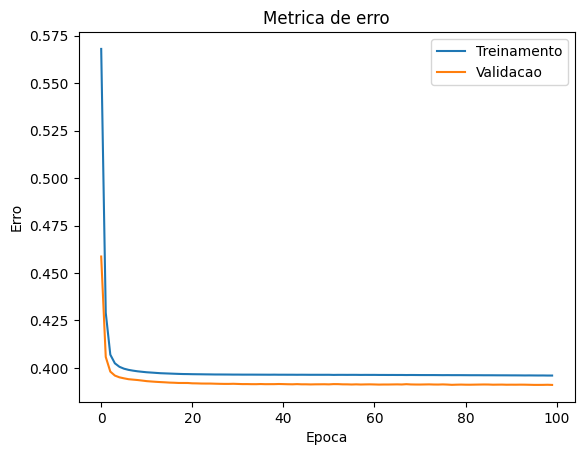

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

In [17]:
# Primeiro adicione o import necessário se ainda não tiver
from sklearn.metrics import roc_auc_score

# Avaliação final do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, 
                                         batch_size=BATCH_SIZE, verbose=0)

print("\n=== RESULTADO FINAL DA REDE NEURAL ===")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.4f}")
print(f"   Loss no conjunto de teste: {test_loss:.4f}")



=== RESULTADO FINAL DA REDE NEURAL ===
   Acurácia no conjunto de TESTE: 0.8255
   Loss no conjunto de teste: 0.3910


In [64]:
# Calculando métricas detalhadas
test_precision = precision_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)
test_auc = roc_auc_score(y_test, y_test_pred_proba.flatten())

print(f"   Precisão: {test_precision:.4f}")
print(f"   Recall: {test_recall:.4f}") 
print(f"   F1-Score: {test_f1:.4f}")
print(f"   AUC-ROC: {test_auc:.4f}")

# CLASSIFICATION REPORT - O que você queria
print("\n=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_test_pred_binary, 
                          target_names=['Sem Depressão', 'Com Depressão']))

   Precisão: 0.8226
   Recall: 0.8299
   F1-Score: 0.8262
   AUC-ROC: 0.9044

=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===
               precision    recall  f1-score   support

Sem Depressão       0.83      0.82      0.82      1587
Com Depressão       0.82      0.83      0.83      1587

     accuracy                           0.83      3174
    macro avg       0.83      0.83      0.83      3174
 weighted avg       0.83      0.83      0.83      3174



In [65]:
# Armazenando resultados para comparação posterior
keras_test_accuracy_1 = test_accuracy
keras_test_precision_1 = test_precision
keras_test_recall_1 = test_recall
keras_test_f1_1 = test_f1
keras_test_auc_1 = test_auc

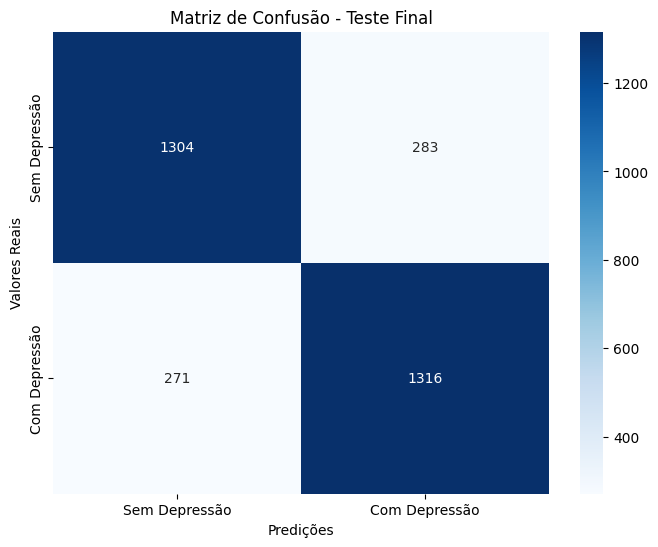

In [22]:
cm = confusion_matrix(y_test, y_test_pred_binary)


# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem Depressão', 'Com Depressão'],
            yticklabels=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Teste Final')
plt.ylabel('Valores Reais')
plt.xlabel('Predições')
plt.show()

### 3.2 Implementação da Rede Neural - Modelo com Regularização

#### Arquitetura Aprimorada

Evoluindo do modelo baseline, implementamos uma arquitetura mais robusta com duas camadas ocultas e técnicas de regularização para melhorar a generalização e reduzir overfitting.

#### Características da Arquitetura

**Estrutura das Camadas:**
- **Entrada**: 10 features
- **1ª Camada Oculta**: 30 neurônios, ReLU, He Normal, L2 (0.01)
- **2ª Camada Oculta**: 15 neurônios, ReLU, He Normal, L2 (0.01)  
- **Saída**: 1 neurônio, Sigmoid, Glorot Normal

#### Melhorias Implementadas

**Regularização L2**: Previne overfitting penalizando pesos grandes (λ = 0.01)

**Early Stopping**: Monitora `val_loss` e interrompe o treinamento quando não há melhoria por 10 épocas

**Otimizador Adam**: Convergência mais rápida e estável comparado ao SGD

**Ativação ReLU**: Resolve problema do gradiente desvanecente nas camadas ocultas

**Validação Cruzada**: Divisão treino/validação (80%/20%) para monitoramento em tempo real

#### Justificativa

A arquitetura decrescente (30 → 15 → 1) cria um funil de abstração, onde cada camada aprende representações progressivamente mais específicas. As técnicas de regularização trabalham em conjunto para garantir boa performance em dados não vistos, mantendo o equilíbrio entre capacidade de aprendizado e generalização.

In [23]:
# Divisão treino/validação (dados já estão escalados do modelo anterior)
X_train_temp, X_val, y_train_temp, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=RANDOM_STATE, stratify=y_train
)

# Criação do modelo
model = Sequential()

model.add(Input(shape=(10,)))
model.add(Dense(30, kernel_initializer='he_normal', 
                kernel_regularizer=regularizers.l2(0.01), 
                activation='relu'))
model.add(Dense(15, kernel_initializer='he_normal', 
                kernel_regularizer=regularizers.l2(0.01), 
                activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_normal', 
                activation='sigmoid'))

print("\nCálculo de parâmetros:\n")
print("Primeira Camada Oculta:")
print("(10 entradas + 1 bias) X 30 neurônios = 11 X 30 = 330 parâmetros")
print("\nSegunda Camada Oculta:")
print("(30 entradas + 1 bias) X 15 neurônios = 31 X 15 = 465 parâmetros")
print("\nCamada de Saída:")
print("(15 entradas + 1 bias) X 1 neurônio = 16 X 1 = 16 parâmetros")
print("\nTotal: 330 + 465 + 16 = 811 parâmetros")




Cálculo de parâmetros:

Primeira Camada Oculta:
(10 entradas + 1 bias) X 30 neurônios = 11 X 30 = 330 parâmetros

Segunda Camada Oculta:
(30 entradas + 1 bias) X 15 neurônios = 31 X 15 = 465 parâmetros

Camada de Saída:
(15 entradas + 1 bias) X 1 neurônio = 16 X 1 = 16 parâmetros

Total: 330 + 465 + 16 = 811 parâmetros


In [24]:
# Configuração do modelo
initial_weights = model.get_weights()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 811 (3.17 KB)

 Trainable params: 811 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Treinamento do modelo
model.set_weights(initial_weights)
history = model.fit(X_train_temp, y_train_temp, 
                   validation_data=(X_val, y_val), 
                   epochs=100, 
                   batch_size=BATCH_SIZE,
                   callbacks=[es])

# Predições
y_test_pred_proba = model.predict(X_test)
y_test_pred_binary = (y_test_pred_proba > 0.5).astype(int).flatten()

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7692 - loss: 1.3371 - val_accuracy: 0.8283 - val_loss: 1.0797
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8185 - loss: 0.9543 - val_accuracy: 0.8260 - val_loss: 0.8167
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8182 - loss: 0.7471 - val_accuracy: 0.8248 - val_loss: 0.6552
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8193 - loss: 0.6200 - val_accuracy: 0.8260 - val_loss: 0.5570
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8192 - loss: 0.5422 - val_accuracy: 0.8272 - val_loss: 0.4963
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8214 - loss: 0.4946 - val_accuracy: 0.8280 - val_loss: 0.4633
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8198 - loss: 0.4664 - val_accuracy: 0.8264 - val_loss: 0.4378
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.4493 - val_accu

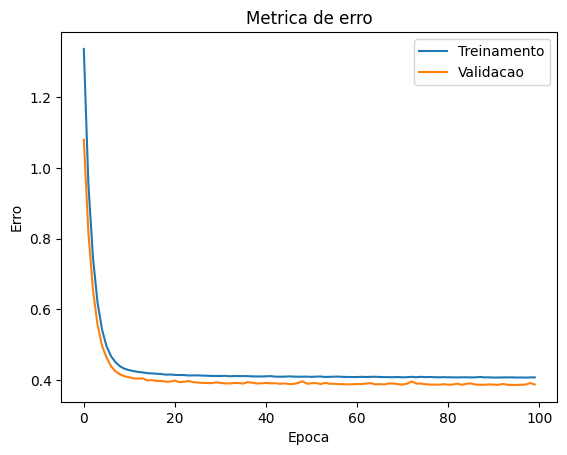

--> E_val - E_in = -0.0147
--> Acuracia (treino): 0.8244
--> Acuracia (validacao): 0.8303
--> acc_train - acc_test = -0.0059
Ein: 0.4016490876674652
Eout: 0.3869248032569885


In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Obtendo a acuracia no conjunto de treinamento
E_in, acc_train = model.evaluate(X_train, y_train, verbose=0)

# Obtendo a acuracia no conjunto de validacao
E_val, acc_val = model.evaluate(X_val, y_val, verbose=0)

print(f"--> E_val - E_in = {E_val - E_in:.4f}")
print(f'--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_test = {acc_train - acc_val:.4f}")

print(f"Ein: {E_in}")
print(f"Eout: {E_val}")



In [27]:
# Avaliação final do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, 
                                         batch_size=BATCH_SIZE, verbose=0)

print("\n=== RESULTADO FINAL DA REDE NEURAL ===")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.2f}")



print("\n=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_test_pred_binary, 
                          target_names=['Sem Depressão', 'Com Depressão']))



=== RESULTADO FINAL DA REDE NEURAL ===
   Acurácia no conjunto de TESTE: 0.83

=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===
               precision    recall  f1-score   support

Sem Depressão       0.84      0.81      0.82      1587
Com Depressão       0.81      0.84      0.83      1587

     accuracy                           0.83      3174
    macro avg       0.83      0.83      0.83      3174
 weighted avg       0.83      0.83      0.83      3174



In [28]:
# Armazenando resultados para comparação posterior
keras_test_accuracy_2 = test_accuracy
keras_test_precision_2 = test_precision
keras_test_recall_2 = test_recall
keras_test_f1_2 = test_f1
keras_test_auc_2 = test_auc

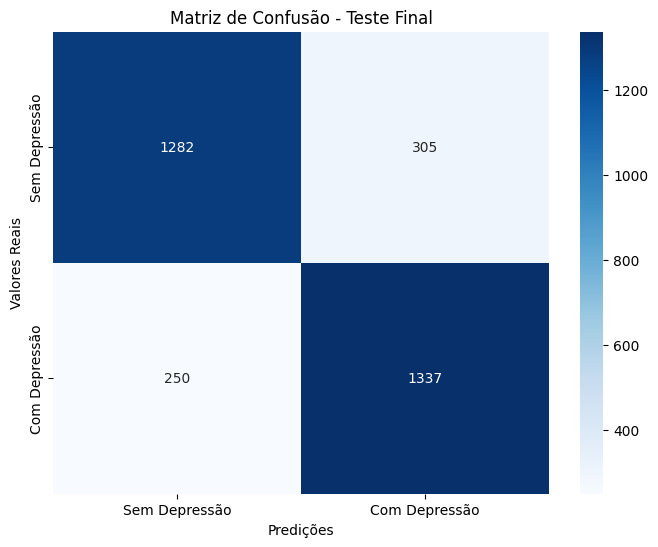

In [29]:
cm = confusion_matrix(y_test, y_test_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem Depressão', 'Com Depressão'],
            yticklabels=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Teste Final')
plt.ylabel('Valores Reais')
plt.xlabel('Predições')
plt.show()

In [30]:
# Análise comparativa dos modelos
print("\nCOMPARACAO ENTRE MODELOS DE REDES NEURAIS")
print("=" * 60)

# Tabela comparativa
print("\nMETRICA          MODELO 1 CAMADA    MODELO 2 CAMADAS    DIFERENCA")
print("-" * 65)

metrics = [
    ("Accuracy", keras_test_accuracy_1, keras_test_accuracy_2),
    ("Precision", keras_test_precision_1, keras_test_precision_2),
    ("Recall", keras_test_recall_1, keras_test_recall_2),
    ("F1-Score", keras_test_f1_1, keras_test_f1_2),
    ("AUC-ROC", keras_test_auc_1, keras_test_auc_2)
]

for metric_name, val1, val2 in metrics:
    diff = val2 - val1
    print(f"{metric_name:<15} {val1:<17.4f} {val2:<17.4f} {diff:+.4f}")

print(f"{'Parametros':<15} {'721':<17} {'811':<17} {'+90'}")
print("-" * 65)

# Análise simples
print("\nANALISE DOS RESULTADOS:")
print(f"- Diferenca media de performance: {(keras_test_accuracy_2 - keras_test_accuracy_1):+.4f}")
print(f"- Aumento de parametros: {((811-721)/721)*100:.1f}%")

# Conclusão e seleção do melhor modelo
diff_acc = keras_test_accuracy_2 - keras_test_accuracy_1

if abs(diff_acc) < 0.01:
    print("- Conclusao: Performance praticamente identica")
    print("- Recomendacao: Modelo 1 camada (menor complexidade)")
    melhor_modelo = "modelo_1_camada"
    melhor_accuracy = keras_test_accuracy_1
    melhor_f1 = keras_test_f1_1
elif diff_acc > 0.01:
    print("- Conclusao: Modelo 2 camadas superior")
    print("- Recomendacao: Modelo 2 camadas")
    melhor_modelo = "modelo_2_camadas"
    melhor_accuracy = keras_test_accuracy_2
    melhor_f1 = keras_test_f1_2
else:
    print("- Conclusao: Modelo 1 camada superior")
    print("- Recomendacao: Modelo 1 camada")
    melhor_modelo = "modelo_1_camada"
    melhor_accuracy = keras_test_accuracy_1
    melhor_f1 = keras_test_f1_1

print("=" * 60)



COMPARACAO ENTRE MODELOS DE REDES NEURAIS

METRICA          MODELO 1 CAMADA    MODELO 2 CAMADAS    DIFERENCA
-----------------------------------------------------------------
Accuracy        0.8255            0.8251            -0.0003
Precision       0.8230            0.8230            +0.0000
Recall          0.8292            0.8292            +0.0000
F1-Score        0.8261            0.8261            +0.0000
AUC-ROC         0.9044            0.9044            +0.0000
Parametros      721               811               +90
-----------------------------------------------------------------

ANALISE DOS RESULTADOS:
- Diferenca media de performance: -0.0003
- Aumento de parametros: 12.5%
- Conclusao: Performance praticamente identica
- Recomendacao: Modelo 1 camada (menor complexidade)


In [ ]:

'''# SALVANDO O MELHOR MODELO
print(f"\nSALVANDO O MELHOR MODELO: {melhor_modelo}")
print("-" * 50)

model.save('./models/melhor_rede_neural.h5')

joblib.dump(scaler, './models/scaler_rede_neural.pkl')

metricas_melhor_modelo = {
    'modelo_nome': melhor_modelo,
    'accuracy': melhor_accuracy,
    'f1_score': melhor_f1,
    'precision': keras_test_precision_1 if melhor_modelo == "modelo_1_camada" else keras_test_precision_2,
    'recall': keras_test_recall_1 if melhor_modelo == "modelo_1_camada" else keras_test_recall_2,
    'auc': keras_test_auc_1 if melhor_modelo == "modelo_1_camada" else keras_test_auc_2,
    'features_utilizadas': features[:-1] if melhor_modelo == "modelo_1_camada" else features[:-1],
    'arquitetura': '60 neurônios, tanh + SGD' if melhor_modelo == "modelo_1_camada" else '30→15 neurônios, ReLU + Adam + L2'
}

with open('../models/metricas_melhor_rede_neural.json', 'w') as f:
    json.dump(metricas_melhor_modelo, f, indent=2)

print("✓ Modelo salvo em: ../models/melhor_rede_neural.h5")
print("✓ Scaler salvo em: ../models/scaler_rede_neural.pkl")
print("✓ Métricas salvas em: ../models/metricas_melhor_rede_neural.json")
print(f"✓ Modelo escolhido: {melhor_modelo}")
print(f"✓ Accuracy: {melhor_accuracy:.4f}")
print(f"✓ F1-Score: {melhor_f1:.4f}")'''

